# HW04

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 第一題

請匯入檔案 `KoreaDrama_re.csv`，計算所有電影的情緒分數，x軸為電影名稱，y軸分正向情緒分數、負向情緒分數、正向情緒分數/負向情緒分數。正向情緒分數、負向情緒分數以長條圖表示，左側Y軸為座標軸。

正向情緒分數/負向情緒分數以折線圖表示，右側Y軸為座標軸。

### 匯入原始資料

In [2]:
# 匯入原始爬蟲資料
df = pd.read_csv('data/KoreaDrama_re.csv')
df.head()

,Unnamed: 0,標題,時間,內容
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ..."
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=..."


In [3]:
# 合併標題與內容為所有文
df["所有文"] = df["標題"] + df["內容"]

# 無意義字元 REGEX
# df["所有文"] = df["所有文"].replace(r'<.*?>', "", regex=True)
# df["所有文"] = df["所有文"].replace(r'https?://.+?\s', "", regex=True)
# df["所有文"] = df["所有文"].replace(r'原文內容|原文連結|作者|標題|時間|看板', "", regex=True)
# df["所有文"] = df["所有文"].replace(r'※|‧|╦|╔|╗|║|╠|╬|╰|╩|╯|╭|╮|│|╪|─|《|》|_|。|、|（|）|　|\*|※|~|○|"|"|～|@|＋|\r|▁|\)|\(|\-|=|\?|,|!|…|&|;|『|』|#|＝|\\l', "", regex=True)
# df["所有文"] = df["所有文"].replace(r'\s*', "", regex=True)

# 無意義字元清單
removeword = [
    'span', 'class', 'f3', 'https', 'imgur', 'h1', '_   blank', 'href', 'rel',
    'nofollow', 'target', 'cdn', 'cgi', 'b4', 'jpg', 'hl', 'b1', 'f5', 'f4',
    'goo.gl', 'f2', 'email', 'map', 'f1', 'f6', '__cf___', 'data', 'bbs',
    'html', 'cf', 'f0', 'b2', 'b3', 'b5', 'b6', '原文內容', '原文連結', '作者',
    '標題', '時間', '看板', '<', '>', '，', '。', '？', '—', '閒聊', '・', '/', ' ',
    '=', '\"', '\n', '」', '「', '！', '[', ']', '：', '‧', '╦', '╔', '╗', '║', '╠', '╬',
    ':', '╰', '╩', '╯', '╭', '╮', '│', '╪', '─', '《', '》', '_', '.', '、', '（', '）',
    '　', '*', '※', '~', '○', '"', '"', '～', '@', '＋', '\r', '▁', ')', '(', '-', '═',
    '?', ',', '!', '…', '&', ';', '『', '』', '#', '＝', r'\l'
]

# 迴圈逐字取代無意義字元
for i in removeword:
    df["所有文"] = df["所有文"].apply(lambda x: x.replace(i, ""))


df.head()

,Unnamed: 0,標題,時間,內容,所有文
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ...",LIVE2018SBS演技大賞2018SBS演技大賞日期20181231時間2055主持人申...
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...,LIVE2018KBS演技大賞2018KBS演技大賞直播201812311955直播網址1a...
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...,心得值得一看的就算死也喜歡雷繼金科長後終於又看到一部讓人忍不住一集接著一集看下去的戲說這部像...
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,ReLIVEtvN阿爾罕布拉宮的回憶EP10以下皆爆雷請慎入E10喪屍席捲而來昨晚看此集的情...
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=...",心得金材昱徐睿知另有他路雷aicomZFcWKLLblankicomZFcWKLLa雖然是電...


### 對所有文做分類

In [4]:
movies = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

### 進行情感分析

In [5]:
from snownlp import SnowNLP

def get_sentiment(text: str) -> float|int:
    s = SnowNLP(text)
    return s.sentiments

df["情緒分數"] = df["所有文"].apply(get_sentiment)
df["情緒標籤"] = df["情緒分數"].apply(lambda x: "Positive" if x >= 0.5 else "Negative")
df.head()


,Unnamed: 0,標題,時間,內容,所有文,情緒分數,情緒標籤
0,13,[LIVE] 2018 SBS 演技大賞,20181231,"<span class=""b1 hl"">2018 SBS 演技大賞</span>\r\n日 ...",LIVE2018SBS演技大賞2018SBS演技大賞日期20181231時間2055主持人申...,0.995638,Positive
1,14,[LIVE] 2018 KBS 演技大賞,20181231,2018 KBS演技大賞\r\n\r\n 直播時間：2018/12/31 19:55\...,LIVE2018KBS演技大賞2018KBS演技大賞直播201812311955直播網址1a...,1.000000,Positive
2,15,[心得] 值得一看的就算死也喜歡(雷),20181231,繼金科長後~終於又看到一部讓人忍不住一集接著一集看下去的戲 說這部像金科長，但又\r\n多了...,心得值得一看的就算死也喜歡雷繼金科長後終於又看到一部讓人忍不住一集接著一集看下去的戲說這部像...,0.998031,Positive
3,16,Re: [LIVE] tvN 阿爾罕布拉宮的回憶 EP10,20181231,以下皆爆雷，請慎入！\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,ReLIVEtvN阿爾罕布拉宮的回憶EP10以下皆爆雷請慎入E10喪屍席捲而來昨晚看此集的情...,0.000063,Negative
4,17,[心得]金材昱、徐睿知：另有他路(雷),20181231,"<a href=""https://i.imgur.com/ZFcWKLL.jpg"" rel=...",心得金材昱徐睿知另有他路雷aicomZFcWKLLblankicomZFcWKLLa雖然是電...,1.000000,Positive


### 將 dataframe 進行分類

In [6]:
movie_sentiment: list[dict] = []

for movie in movies:
    df_movie = df[df["所有文"].str.contains(movie)]
    df_movie_group = df_movie.groupby(["情緒標籤"])
    df_movie_score = df_movie_group["情緒分數"].mean()

    pn_score = df_movie_score.get("Positive", 0) / max(df_movie_score.get("Negative", 1), 1)

    movie_sentiment.append({
        "電影名稱": movie,
        "正向情緒分數": df_movie_score.get("Positive", 0),
        "正向情緒筆數": len(df_movie[df_movie["情緒標籤"] == "Positive"]),
        "負向情緒分數": df_movie_score.get("Negative", 0),
        "負向情緒筆數": len(df_movie[df_movie["情緒標籤"] == "Negative"]),
        "正向情緒分數/負向情緒分數": pn_score
    })

movie_sentiment_df = pd.DataFrame(movie_sentiment)
movie_sentiment_df

,電影名稱,正向情緒分數,正向情緒筆數,負向情緒分數,負向情緒筆數,正向情緒分數/負向情緒分數
0,成為王的男人,1.000000,1,9.192411e-06,1,1.000000
1,皇后的品格,0.976195,19,7.685763e-03,5,0.976195
2,赤月青日,0.985999,10,5.526741e-04,3,0.985999
3,神的測驗,0.998988,10,2.759442e-07,7,0.998988
4,死之詠讚,0.929679,7,0.000000e+00,2,0.929679
5,加油吧威基基,0.999948,12,5.538162e-04,1,0.999948
6,皮諾丘,0.999534,10,0.000000e+00,10,0.999534
7,魔女寶鑑,1.000000,7,0.000000e+00,0,1.000000
8,男朋友,0.995043,11,1.566648e-02,9,0.995043
9,來自星星的你,0.999950,10,0.000000e+00,0,0.999950


### 針對計算出的數值進行畫圖

呈現正負向情緒分數和筆數。

<Figure size 1400x700 with 0 Axes>

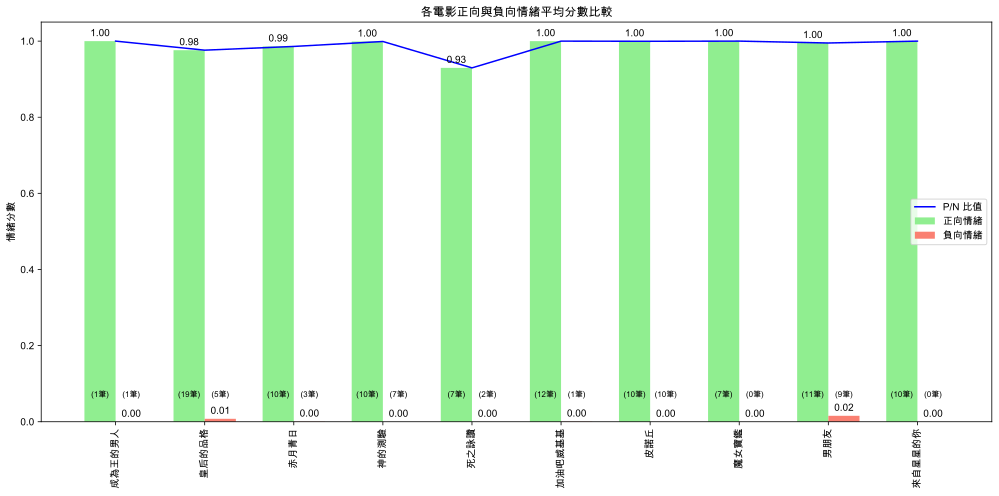

In [7]:
# 準備繪圖資料
plt.figure(figsize=(14, 7))

# 取得電影列表與位置
movie_names = movie_sentiment_df["電影名稱"]
x = np.arange(len(movie_names))
width = 0.35  # 長條圖的寬度

# 繪製正向與負向情緒分數的長條圖
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width/2, movie_sentiment_df["正向情緒分數"], width, label='正向情緒', color='lightgreen')
rects2 = ax.bar(x + width/2, movie_sentiment_df["負向情緒分數"], width, label='負向情緒', color='salmon')

# 加入 P/N 比值
rects3 = ax.plot(x, movie_sentiment_df["正向情緒分數/負向情緒分數"], label='P/N 比值', color='blue')

# 添加圖表標題與軸標籤
ax.set_title('各電影正向與負向情緒平均分數比較')
ax.set_ylabel('情緒分數')
ax.set_xticks(x)
ax.set_xticklabels(movie_names, rotation=90)
ax.legend()

# 添加數值標籤
def autolabel(rects):
    """為長條圖添加數值標籤"""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):  # 確認數值不是 NaN
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3點垂直偏移
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# 添加資料筆數標籤
for i, pos_count in enumerate(movie_sentiment_df["正向情緒筆數"]):
    ax.annotate(f'({pos_count}筆)',
                xy=(x[i] - width/2, 0.1),
                xytext=(0, -15),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)
                
for i, neg_count in enumerate(movie_sentiment_df["負向情緒筆數"]):
    ax.annotate(f'({neg_count}筆)',
                xy=(x[i] + width/2, 0.1),
                xytext=(0, -15),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
